In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/churn_data_processed.csv')

# Basic Analysis

## What is the overall churn rate?

In [4]:
# Calculate the overall churn rate (0 = No, 1 = Yes)
overall_churn_rate = df['Churn'].value_counts(normalize=True)[1]

print(f"The overall churn rate is: {overall_churn_rate:.2%}")

The overall churn rate is: 26.54%


## How does the churn rate differ between make and female customers?

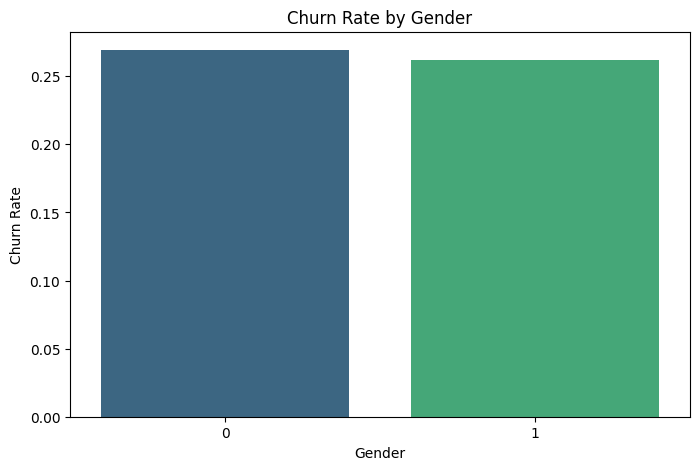

Churn Rate by Gender:
Churn          0         1
gender                    
0       0.730791  0.269209
1       0.738397  0.261603


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate by gender (Female = 0, Male = 1)
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Plot the churn rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender[1], palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

## What are the most common reasons customers cite for churning?

## What is the average tenure of customers who churned?

## What is the average tenure of customers who churned?